Loading appropriate library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Classifier Modules
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

Loading Kidney disease data

In [2]:
df = pd.read_csv("kidney_disease_train.csv")
df_test = pd.read_csv("kidney_disease_test.csv")

In [3]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,...,39.0,7900,3.9,yes,yes,no,good,no,no,ckd
1,109,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
2,17,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,poor,no,no,ckd
3,347,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,43.0,7200,5.5,no,no,no,good,no,no,notckd
4,24,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,...,39.0,8300,4.6,yes,no,no,poor,no,no,ckd


In [4]:
df_test.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,209,19.0,70.0,1.020,0.0,0.0,NaN,normal,notpresent,notpresent,...,11.5,NaN,6900.0,NaN,no,no,no,good,no,no
1,280,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,13.3,52,8100.0,5.2,no,no,no,good,no,no
2,33,60.0,100.0,1.020,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,10.1,29,NaN,NaN,yes,no,no,poor,no,no
3,210,59.0,100.0,1.015,4.0,2.0,normal,normal,notpresent,notpresent,...,7.3,20,9800.0,3.9,yes,yes,yes,good,no,yes
4,93,73.0,100.0,1.010,3.0,2.0,abnormal,abnormal,present,notpresent,...,9.2,30,7000.0,3.2,yes,yes,yes,poor,no,no


Analysis

In [5]:
len(df)

280

In [6]:
len(df_test)

120

In [7]:
df.drop_duplicates()
df_test.drop_duplicates()
len(df)

280

In [8]:
len(df_test)

120

No duplicates are present

In [9]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [10]:
df.classification.value_counts()

classification
ckd       174
notckd    106
Name: count, dtype: int64

ckd-----> has chronic kidney disease
notckd-----> does not have chronic kidney disease

<Axes: >

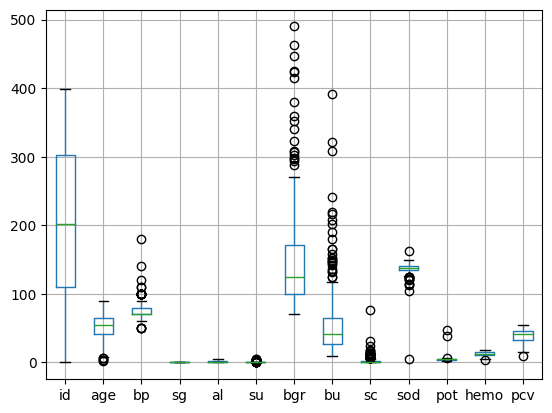

In [11]:
df.boxplot()

In [12]:
df = df.rename(columns={'bp': 'blood_pressure','sg': 'specific_gravity','al': 'albumin','su': 'sugar',
                   'rbc': 'red_blood_cells','pc': 'pus_cell','pcc': 'pus_cell_clumps','ba': 'bacteria',
                   'bgr': 'blood_glucose_random','bu': 'blood_urea','sc': 'serum_creatinine',
                   'sod': 'sodium','pot': 'potassium','hemo': 'hemoglobin','pcv': 'packed_cell_volume',
                   'wc': 'white_blood_cell','rc': 'red_blood_cell','htn': 'hypertension','dm': 'diabetes_mellitus',
                   'cad': 'coronary_artery_disease','appet': 'appetite','pe': 'pedal_edema','ane': 'anemia'})

In [13]:
df['white_blood_cell'] = pd.to_numeric(df['white_blood_cell'], errors='coerce')
df['red_blood_cell'] = pd.to_numeric(df['red_blood_cell'], errors='coerce')

Boolean value for each object feature

In [14]:
df.red_blood_cells = df.red_blood_cells.map({ 'normal' : 1, 'abnormal' : 0})
df.pus_cell = df.pus_cell.map({ 'normal' : 1, 'abnormal' : 0})
df.pus_cell_clumps = df.pus_cell_clumps.map({ 'present' : 1, 'notpresent' : 0})
df.bacteria = df.bacteria.map({ 'present' : 1, 'notpresent' : 0})
df.hypertension = df.hypertension.map({ 'yes' : 1, 'no' : 0})
df.diabetes_mellitus = df.diabetes_mellitus.map({ 'yes' : 1, '\tyes' : 1, '\tno' : 0, 'no' : 0})
df.coronary_artery_disease = df.coronary_artery_disease.map({ 'yes' : 1, 'no' : 0, '\tno' : 0})
df.appetite = df.appetite.map({ 'good' : 1, 'poor' : 0})
df.pedal_edema = df.pedal_edema.map({ 'yes' : 1, 'no' : 0})
df.anemia = df.anemia.map({ 'yes' : 1, 'no' : 0})
df.classification = df.classification.map({ 'ckd' : 1, 'notckd' : 0})

In [15]:
df.columns

Index(['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell',
       'red_blood_cell', 'hypertension', 'diabetes_mellitus',
       'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia',
       'classification'],
      dtype='object')

Checing Null values in the dataset

In [16]:
df.isnull().sum()

id                           0
age                          5
blood_pressure               9
specific_gravity            36
albumin                     35
sugar                       38
red_blood_cells            107
pus_cell                    50
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        33
blood_urea                  14
serum_creatinine            12
sodium                      67
potassium                   68
hemoglobin                  39
packed_cell_volume          51
white_blood_cell            78
red_blood_cell              94
hypertension                 1
diabetes_mellitus            1
coronary_artery_disease      1
appetite                     0
pedal_edema                  0
anemia                       0
classification               0
dtype: int64

In [17]:
df.describe()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell,red_blood_cell,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
count,280.000000,275.000000,271.000000,244.000000,245.000000,242.000000,173.000000,230.000000,276.000000,276.000000,...,229.000000,202.000000,186.000000,279.000000,279.000000,279.000000,280.000000,280.000000,280.000000,280.000000
mean,202.928571,51.454545,76.051661,1.017439,1.024490,0.438017,0.832370,0.786957,0.094203,0.057971,...,39.165939,8354.950495,4.706452,0.365591,0.362007,0.082437,0.778571,0.182143,0.142857,0.621429
std,111.988168,17.476176,14.256289,0.005746,1.375805,1.073193,0.374622,0.410351,0.292641,0.234113,...,8.774388,3107.125537,1.029280,0.482461,0.481444,0.275524,0.415952,0.386653,0.350554,0.485899
min,1.000000,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,110.500000,42.000000,70.000000,1.010000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,33.000000,6325.000000,3.925000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,202.000000,55.000000,70.000000,1.020000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,41.000000,7900.000000,4.800000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,302.250000,65.000000,80.000000,1.020000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,46.000000,9800.000000,5.500000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
def fill_nans():
    """
    Fill the null values of each column with its median value
    created under new column names ending with '_filled'

    :return: A dataframe where the columns of data type float64 have their NaN values replaced
             with the median of each column under a new column name ending with '_filled'
    """
    for col in df.columns:
        if df[col].dtype == 'float64':
            new_col = str(col + '_filled')
            df[new_col] = df[col].transform(lambda x: x.fillna(x.median()))
    return df

fill_nans()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,serum_creatinine_filled,sodium_filled,potassium_filled,hemoglobin_filled,packed_cell_volume_filled,white_blood_cell_filled,red_blood_cell_filled,hypertension_filled,diabetes_mellitus_filled,coronary_artery_disease_filled
0,157,62.0,70.0,1.025,3.0,0.0,1.0,0.0,0.0,0.0,...,1.7,136.0,4.7,12.6,39.0,7900.0,3.9,1.0,1.0,0.0
1,109,54.0,70.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,1.9,138.0,4.4,11.7,41.0,7900.0,4.8,0.0,1.0,0.0
2,17,47.0,80.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,5.2,139.0,3.7,12.1,41.0,7900.0,4.8,1.0,0.0,0.0
3,347,43.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,144.0,5.0,17.8,43.0,7200.0,5.5,0.0,0.0,0.0
4,24,42.0,100.0,1.015,4.0,0.0,1.0,0.0,0.0,1.0,...,1.4,129.0,4.0,11.1,39.0,8300.0,4.6,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,71,46.0,60.0,1.010,1.0,0.0,1.0,1.0,0.0,0.0,...,3.3,141.0,4.0,9.8,28.0,14600.0,3.2,1.0,1.0,0.0
276,106,50.0,90.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,6.1,127.0,4.4,6.0,17.0,6500.0,4.8,1.0,1.0,0.0
277,270,23.0,80.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,1.1,145.0,4.0,14.3,41.0,7200.0,5.0,0.0,0.0,0.0
278,348,38.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,...,0.5,147.0,3.5,13.6,44.0,7300.0,6.4,0.0,0.0,0.0


In [19]:
df.isnull().sum()

id                                  0
age                                 5
blood_pressure                      9
specific_gravity                   36
albumin                            35
sugar                              38
red_blood_cells                   107
pus_cell                           50
pus_cell_clumps                     4
bacteria                            4
blood_glucose_random               33
blood_urea                         14
serum_creatinine                   12
sodium                             67
potassium                          68
hemoglobin                         39
packed_cell_volume                 51
white_blood_cell                   78
red_blood_cell                     94
hypertension                        1
diabetes_mellitus                   1
coronary_artery_disease             1
appetite                            0
pedal_edema                         0
anemia                              0
classification                      0
age_filled  

In [20]:
# Drop columns which have not been filled
new_df = df.drop(columns=['age', 'blood_pressure', 'specific_gravity',
                          'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
                          'pus_cell_clumps', 'bacteria','blood_glucose_random',
                          'blood_urea', 'serum_creatinine', 'sodium','potassium',
                          'hemoglobin', 'packed_cell_volume', 'white_blood_cell',
                          'red_blood_cell', 'hypertension', 'diabetes_mellitus',
                          'coronary_artery_disease'])

# Re-order columns to match the original df
new_df = new_df[['id', 'age_filled', 'blood_pressure_filled',
           'specific_gravity_filled', 'albumin_filled', 'sugar_filled',
           'red_blood_cells_filled', 'pus_cell_filled', 'pus_cell_clumps_filled',
           'bacteria_filled', 'blood_glucose_random_filled', 'blood_urea_filled',
           'serum_creatinine_filled', 'sodium_filled', 'potassium_filled',
           'hemoglobin_filled', 'packed_cell_volume_filled',
           'white_blood_cell_filled', 'red_blood_cell_filled',
           'hypertension_filled', 'diabetes_mellitus_filled',
           'coronary_artery_disease_filled','appetite',
           'pedal_edema', 'anemia','classification']]

In [21]:
def find_outliers(col):
    """
    Identify the outliers of each column of a dataframe using the Tukey rule

    :return: A dataframe of the outliers for each column
    """
    # Calculate the first quartile
    Q1 = df[col].quantile(.25)

    # Calculate the third quartile
    Q3 = df[col].quantile(.75)

    # Calculate the interquartile range Q3 - Q1
    IQR = Q3 - Q1
    IQR

    # Calculate the maximum value and minimum values according to the Tukey rule
    # max_value is Q3 + 1.5 * IQR while min_value is Q1 - 1.5 * IQR

    max_value = Q3 + 1.5 * IQR
    min_value = Q1 - 1.5 * IQR

    # Filter the training data for values that are greater than max_value or less than min_value
    outliers = df[(df[col] > max_value) | (df[col] < min_value)]
    return outliers

In [22]:
for col in new_df.columns:
    feat_count = len(new_df[col].value_counts())
    print('{}: {}'.format(col, feat_count))

id: 280
age_filled: 70
blood_pressure_filled: 10
specific_gravity_filled: 5
albumin_filled: 6
sugar_filled: 6
red_blood_cells_filled: 2
pus_cell_filled: 2
pus_cell_clumps_filled: 2
bacteria_filled: 2
blood_glucose_random_filled: 126
blood_urea_filled: 99
serum_creatinine_filled: 71
sodium_filled: 33
potassium_filled: 35
hemoglobin_filled: 102
packed_cell_volume_filled: 39
white_blood_cell_filled: 76
red_blood_cell_filled: 44
hypertension_filled: 2
diabetes_mellitus_filled: 2
coronary_artery_disease_filled: 2
appetite: 2
pedal_edema: 2
anemia: 2
classification: 2


In [23]:
# Outliers to be removed for the logistic regression model
age_outliers = find_outliers('age_filled')
bgr_outliers = find_outliers('blood_glucose_random_filled')
bu_outliers = find_outliers('blood_urea_filled')
sc_outliers = find_outliers('serum_creatinine_filled')
hem_outliers = find_outliers('hemoglobin_filled')
wbc_outliers = find_outliers('white_blood_cell_filled')
rbc_outliers = find_outliers('red_blood_cell_filled')
bp_outliers = find_outliers('blood_pressure_filled')
sod_outliers = find_outliers('sodium_filled')
pot_outliers = find_outliers('potassium_filled')
pcv_outliers = find_outliers('packed_cell_volume_filled')

In [24]:
all_outliers = [age_outliers,
                bgr_outliers,
                bu_outliers,
                sc_outliers,
                hem_outliers,
                wbc_outliers,
                rbc_outliers,
                bp_outliers,
                sod_outliers,
                pot_outliers,
                pcv_outliers
                ]

In [25]:
df_outliers = pd.concat(all_outliers)

In [26]:
len(df_outliers)

224

In [27]:
len(df_outliers[df_outliers.classification == 1])

195

In [28]:
df_outliers.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,serum_creatinine_filled,sodium_filled,potassium_filled,hemoglobin_filled,packed_cell_volume_filled,white_blood_cell_filled,red_blood_cell_filled,hypertension_filled,diabetes_mellitus_filled,coronary_artery_disease_filled
89,185,4.0,NaN,1.02,1.0,0.0,NaN,1.0,0.0,0.0,...,0.6,138.0,4.4,12.0,34.0,7900.0,4.8,0.0,0.0,0.0
169,215,2.0,NaN,1.01,3.0,0.0,1.0,0.0,0.0,0.0,...,1.3,138.0,4.4,12.7,41.0,7900.0,4.8,0.0,0.0,0.0
212,190,6.0,60.0,1.01,4.0,0.0,0.0,0.0,0.0,1.0,...,1.0,135.0,4.9,9.9,30.0,16700.0,4.8,0.0,0.0,0.0
217,1,7.0,50.0,1.02,4.0,0.0,NaN,1.0,0.0,0.0,...,0.8,138.0,4.4,11.3,38.0,6000.0,4.8,0.0,0.0,0.0
246,187,3.0,NaN,1.01,2.0,0.0,1.0,1.0,0.0,0.0,...,0.7,138.0,4.4,10.7,34.0,12300.0,4.8,0.0,0.0,0.0


In [29]:
df_outliers_removed = new_df.drop(df_outliers.index).reset_index(drop=True)
len(df_outliers_removed)

153

In [30]:
df_outliers_removed.classification.value_counts()

classification
0    79
1    74
Name: count, dtype: int64

0-----> does not have disease
1-----> has disease

In [32]:
new_df.classification.value_counts()

classification
1    174
0    106
Name: count, dtype: int64

In [33]:
df_outliers_removed = df_outliers_removed.drop(columns=['id'])
new_df = new_df.drop(columns=['id'])
df_test = df_test.drop(columns=['id'])

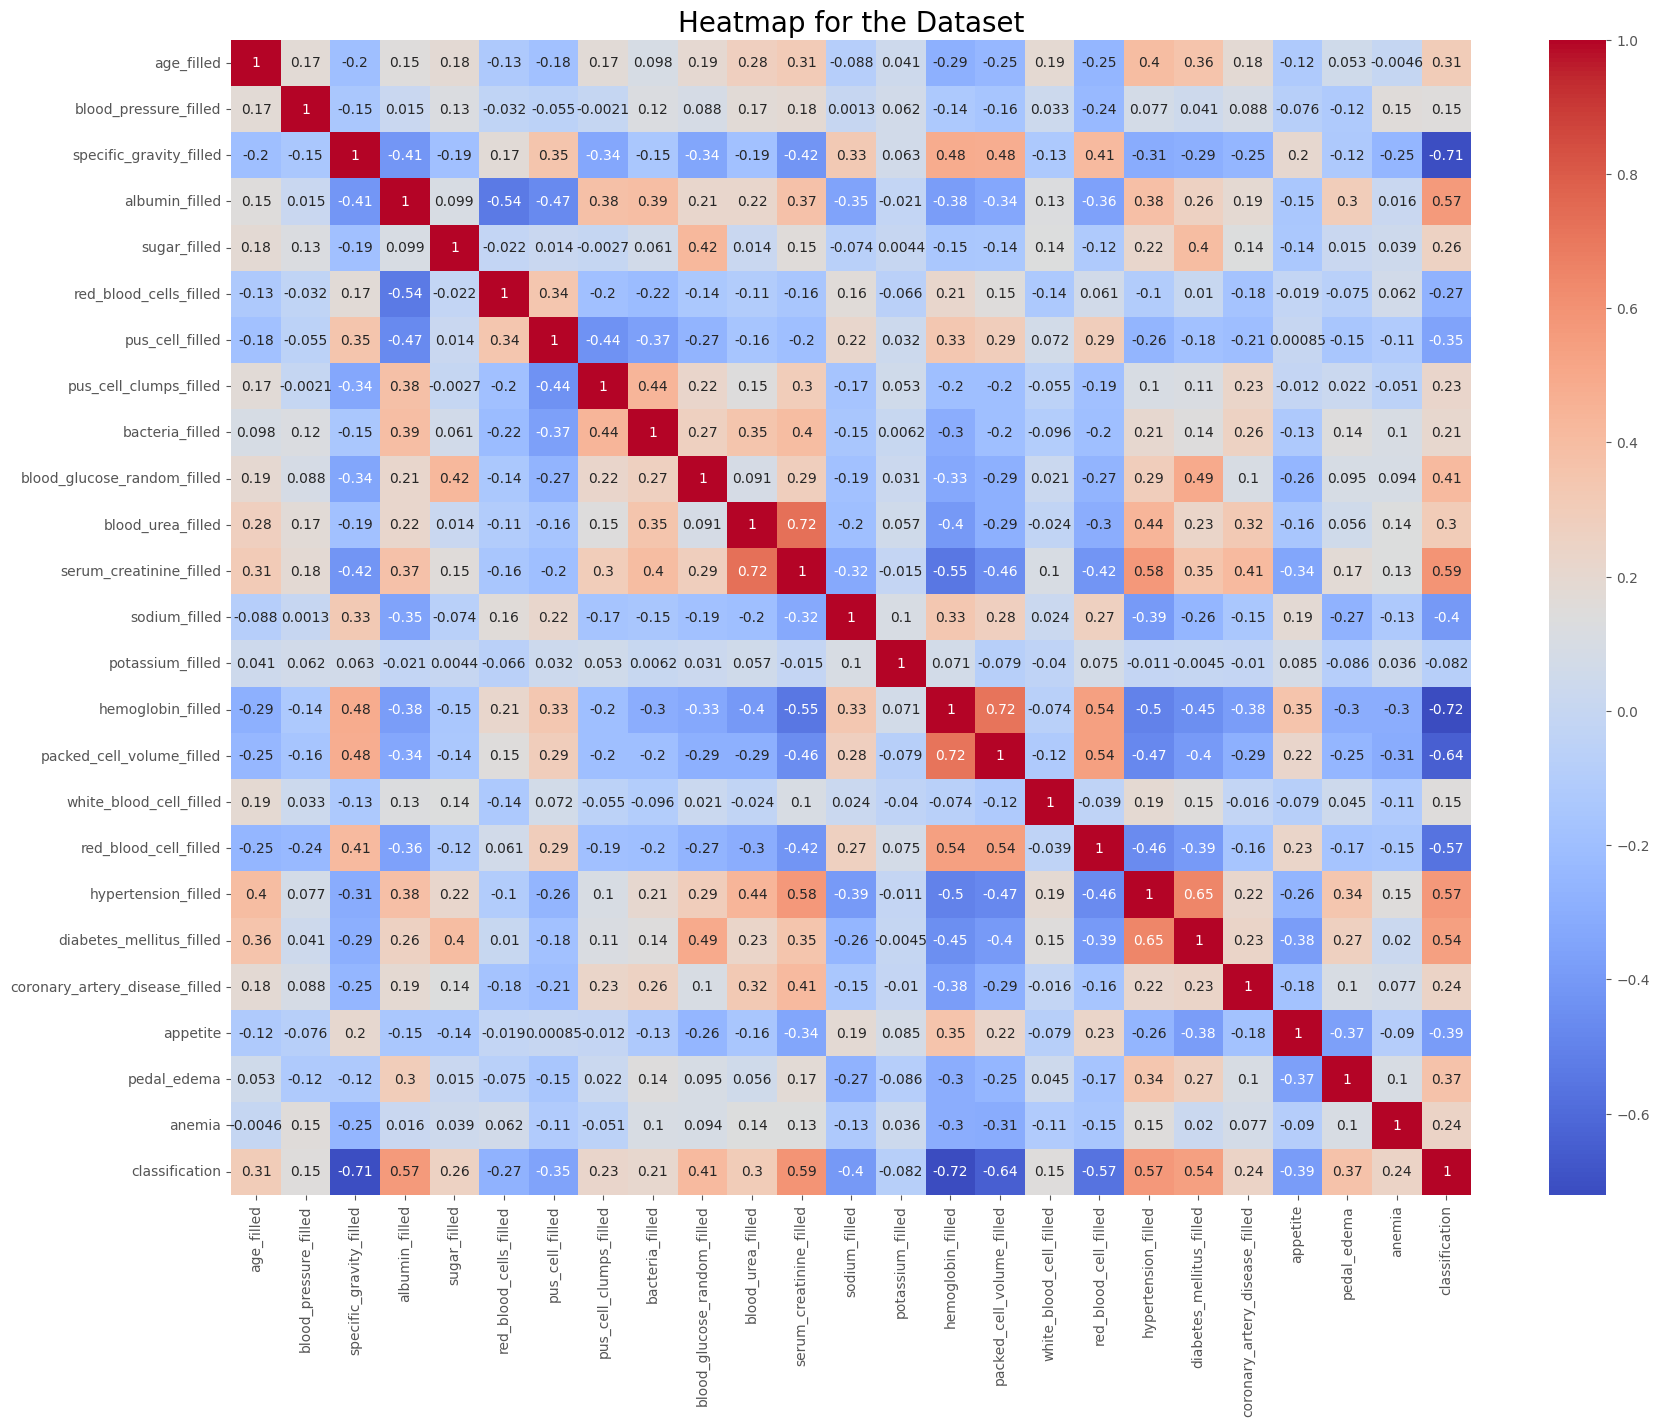

In [34]:
plt.rcParams['figure.figsize'] = (20, 15)
plt.style.use('ggplot')

sns.heatmap(df_outliers_removed.corr(), annot = True, cmap = 'coolwarm')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

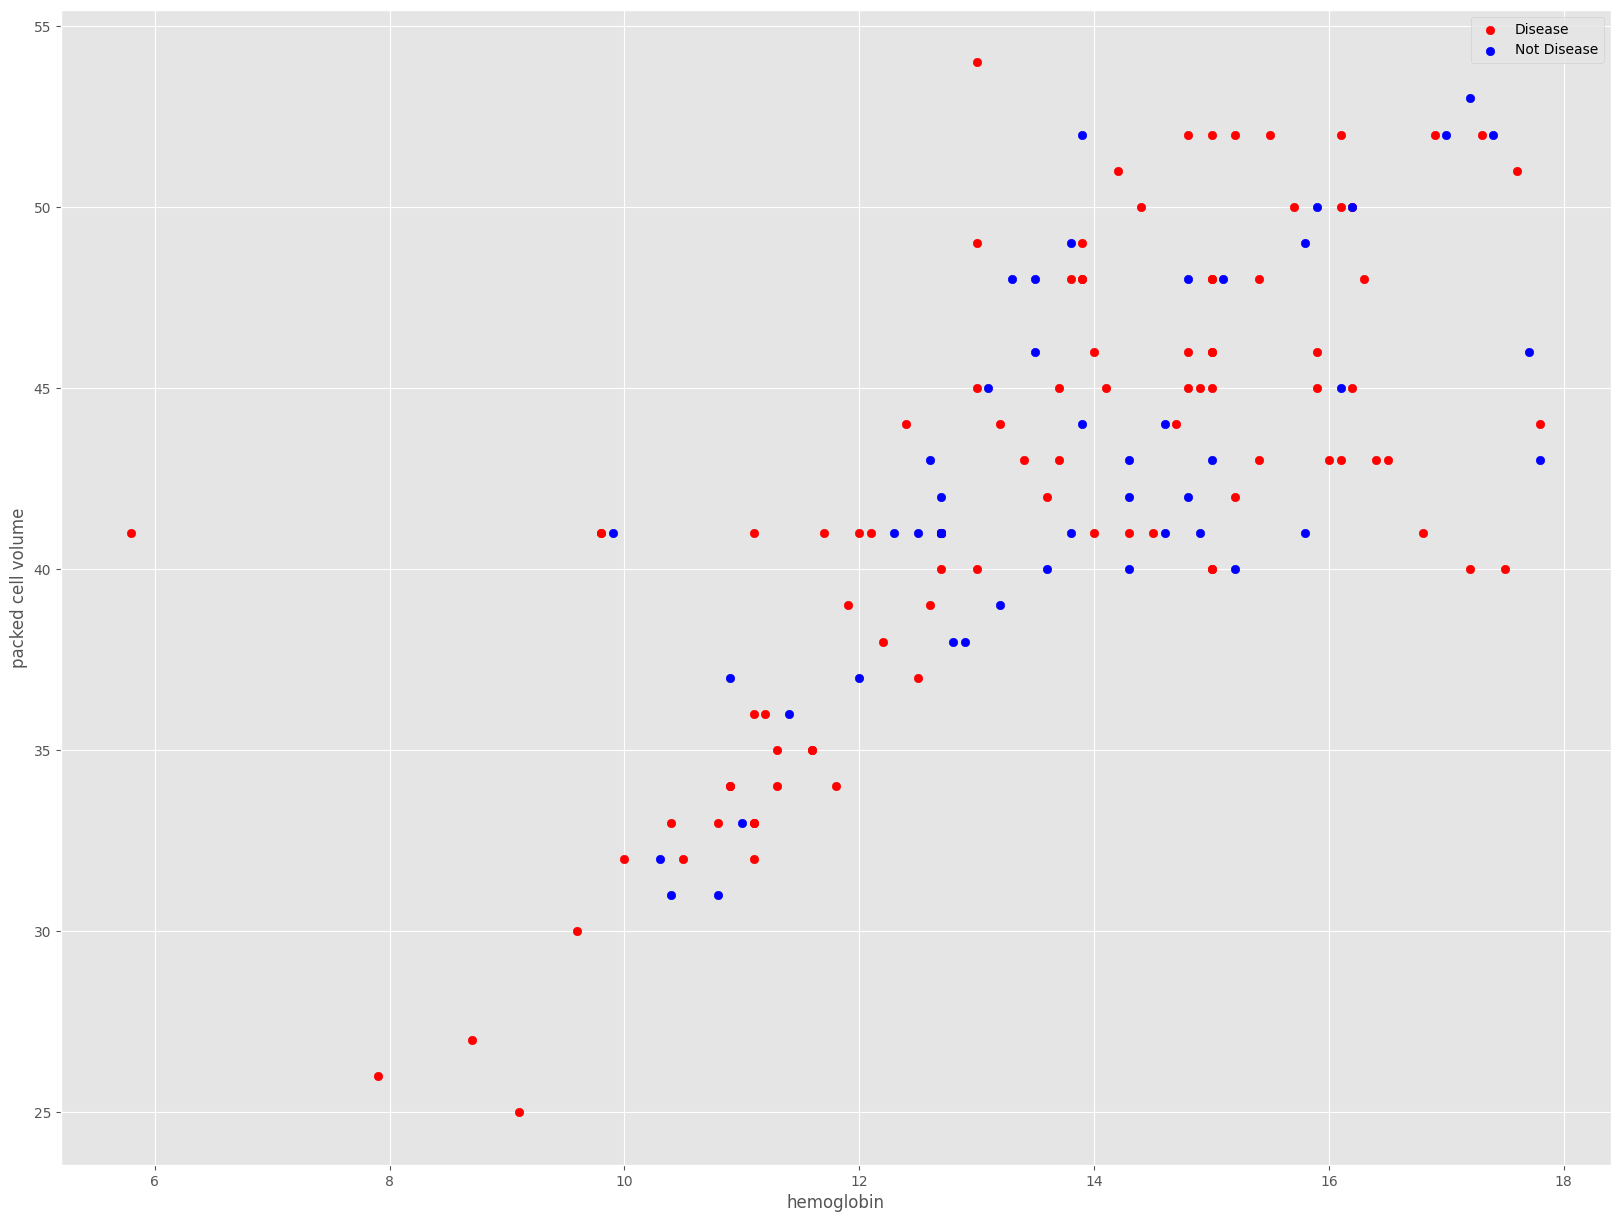

In [35]:
plt.scatter(x=df_outliers_removed.hemoglobin_filled[df.classification==1], y=df_outliers_removed.packed_cell_volume_filled[(df.classification==1)], c="red")
plt.scatter(x=df_outliers_removed.hemoglobin_filled[df.classification==0], y=df_outliers_removed.packed_cell_volume_filled[(df.classification==0)], c="blue")
plt.legend(["Disease", "Not Disease"])
plt.xlabel("hemoglobin")
plt.ylabel("packed cell volume")
plt.show()

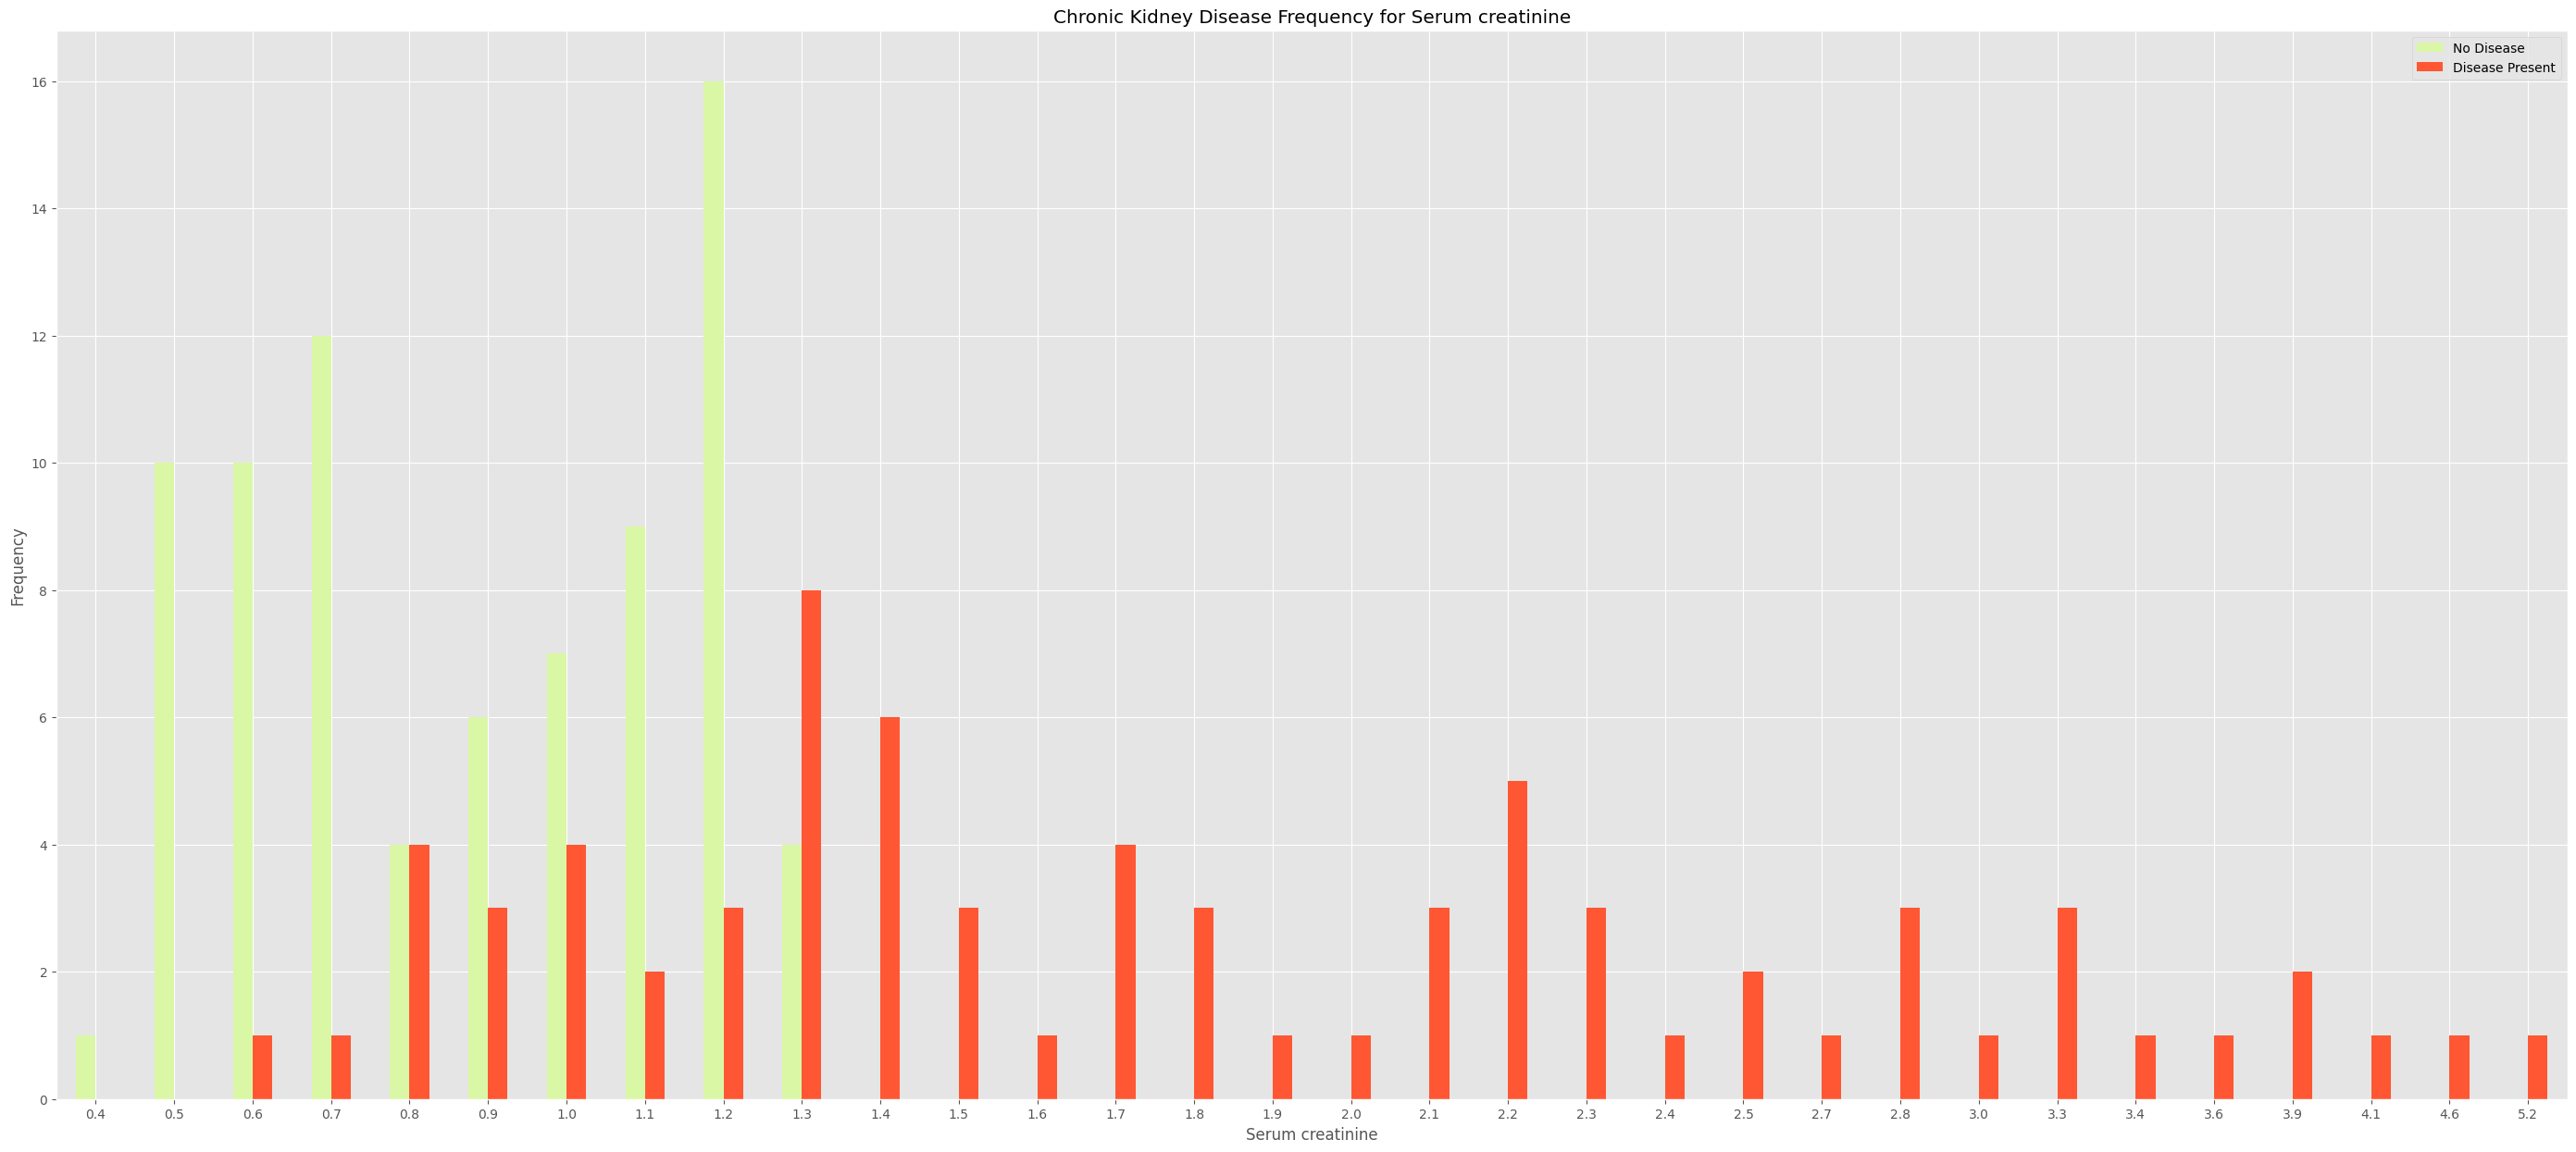

In [36]:
pd.crosstab(df_outliers_removed.serum_creatinine_filled,df_outliers_removed.classification).plot(kind="bar",figsize=(35,15),color=['#DAF7A6','#FF5733'])
plt.title('Chronic Kidney Disease Frequency for Serum creatinine')
plt.xlabel('Serum creatinine')
plt.xticks(rotation = 0)
plt.legend(["No Disease", "Disease Present"])
plt.ylabel('Frequency')
plt.show()

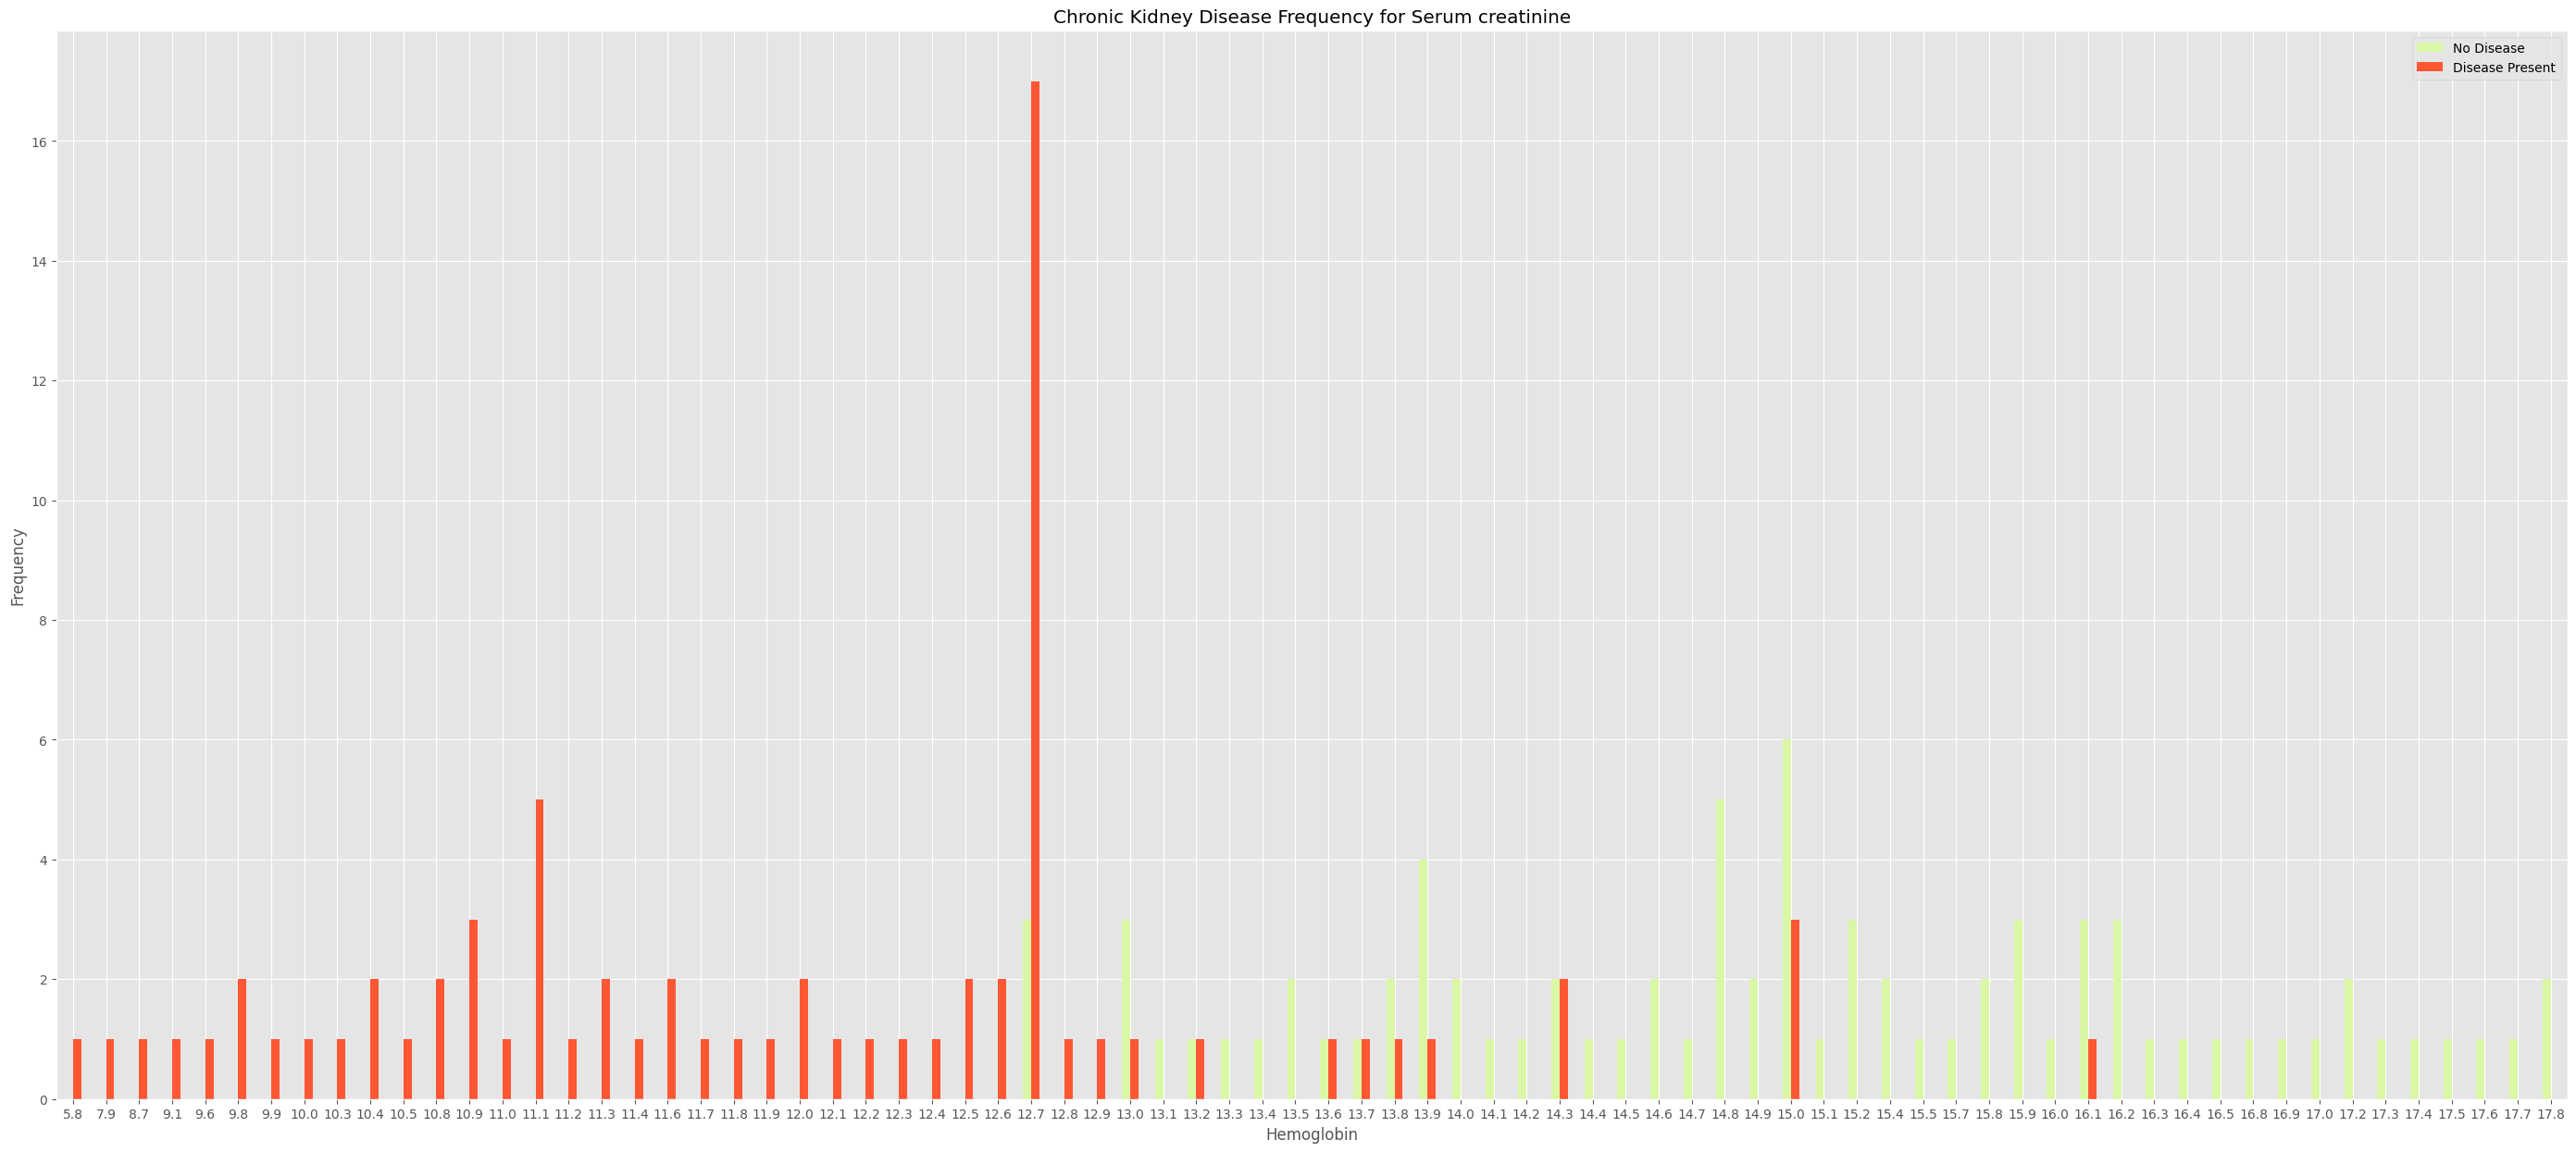

In [37]:
pd.crosstab(df_outliers_removed.hemoglobin_filled,df_outliers_removed.classification).plot(kind="bar",figsize=(35,15),color=['#DAF7A6','#FF5733'])
plt.title('Chronic Kidney Disease Frequency for Serum creatinine')
plt.xlabel('Hemoglobin')
plt.xticks(rotation = 0)
plt.legend(["No Disease", "Disease Present"])
plt.ylabel('Frequency')
plt.show()

In [38]:
df_test.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'],
      dtype='object')

In [39]:
df_outliers_removed = df_outliers_removed.rename(columns={'age_filled': 'age',
                                                          'blood_pressure_filled': 'bp',
                                                          'specific_gravity_filled': 'sg',
                                                          'albumin_filled': 'al',
                                                          'sugar_filled': 'su',
                                                          'red_blood_cells_filled': 'rbc',
                                                          'pus_cell_filled': 'pc',
                                                          'pus_cell_clumps_filled': 'pcc',
                                                          'bacteria_filled': 'ba',
                                                          'blood_glucose_random_filled': 'bgr',
                                                          'blood_urea_filled': 'bu',
                                                          'serum_creatinine_filled': 'sc',
                                                          'sodium_filled': 'sod',
                                                          'potassium_filled': 'pot',
                                                          'hemoglobin_filled': 'hemo',
                                                          'packed_cell_volume_filled': 'pcv',
                                                          'white_blood_cell_filled': 'wc',
                                                          'red_blood_cell_filled': 'rc',
                                                          'hypertension_filled': 'htn',
                                                          'diabetes_mellitus_filled': 'dm',
                                                          'coronary_artery_disease_filled': 'cad',
                                                          'appetite': 'appet',
                                                          'pedal_edema': 'pe',
                                                          'anemia': 'ane'})

In [40]:
df_outliers_removed.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [41]:
df_outliers_removed.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,62.0,70.0,1.025,3.0,0.0,1.0,0.0,0.0,0.0,122.0,...,39.0,7900.0,3.9,1.0,1.0,0.0,1,0,0,1
1,54.0,70.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,233.0,...,41.0,7900.0,4.8,0.0,1.0,0.0,1,0,0,1
2,47.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,114.0,...,41.0,7900.0,4.8,1.0,0.0,0.0,0,0,0,1
3,43.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,108.0,...,43.0,7200.0,5.5,0.0,0.0,0.0,1,0,0,0
4,29.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,83.0,...,40.0,9900.0,4.7,0.0,0.0,0.0,1,0,0,0


Test data

In [42]:
df_test.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,19.0,70.0,1.020,0.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,11.5,NaN,6900.0,NaN,no,no,no,good,no,no
1,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,93.0,...,13.3,52,8100.0,5.2,no,no,no,good,no,no
2,60.0,100.0,1.020,2.0,0.0,abnormal,abnormal,notpresent,notpresent,140.0,...,10.1,29,NaN,NaN,yes,no,no,poor,no,no
3,59.0,100.0,1.015,4.0,2.0,normal,normal,notpresent,notpresent,255.0,...,7.3,20,9800.0,3.9,yes,yes,yes,good,no,yes
4,73.0,100.0,1.010,3.0,2.0,abnormal,abnormal,present,notpresent,295.0,...,9.2,30,7000.0,3.2,yes,yes,yes,poor,no,no


In [43]:
df_test.isnull().sum()

age       4
bp        3
sg       11
al       11
su       11
rbc      45
pc       15
pcc       0
ba        0
bgr      11
bu        5
sc        5
sod      20
pot      20
hemo     13
pcv      19
wc       28
rc       37
htn       1
dm        1
cad       1
appet     1
pe        1
ane       1
dtype: int64

In [44]:
df_test.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv       object
wc       float64
rc       float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
dtype: object

In [45]:
df_test.rbc = df_test.rbc.map({ 'normal' : 1, 'abnormal' : 0})
df_test.pc = df_test.pc.map({ 'normal' : 1, 'abnormal' : 0})
df_test.pcc = df_test.pcc.map({ 'present' : 1, 'notpresent' : 0})
df_test.ba = df_test.ba.map({ 'present' : 1, 'notpresent' : 0})
df_test.htn = df_test.htn.map({ 'yes' : 1, 'no' : 0})
df_test.dm = df_test.dm.map({ 'yes' : 1, '\tyes' : 1, '\tno' : 0, 'no' : 0})
df_test.cad = df_test.cad.map({ 'yes' : 1, 'no' : 0, '\tno' : 0})
df_test.appet = df_test.appet.map({ 'good' : 1, 'poor' : 0})
df_test.pe = df_test.pe.map({ 'yes' : 1, 'no' : 0})
df_test.ane = df_test.ane.map({ 'yes' : 1, 'no' : 0})

In [46]:
df_test.pcv = pd.to_numeric(df_test.pcv, errors='coerce')

In [47]:
def fill_nans_test():
    """
    Fill the null values of each column with its median value

    :return: A dataframe where the columns of data type float64 have their NaN values replaced
             with the median of the column
    """
    for col in df_test.columns:
        if df_test[col].dtype == 'float64':
            df_test[col] = df_test[col].transform(lambda x: x.fillna(x.median()))
    return df_test

fill_nans_test()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,19.0,70.0,1.020,0.0,0.0,1.0,1.0,0,0,113.0,...,11.5,40.0,6900.0,4.8,0.0,0.0,0.0,1.0,0.0,0.0
1,47.0,80.0,1.020,0.0,0.0,1.0,1.0,0,0,93.0,...,13.3,52.0,8100.0,5.2,0.0,0.0,0.0,1.0,0.0,0.0
2,60.0,100.0,1.020,2.0,0.0,0.0,0.0,0,0,140.0,...,10.1,29.0,8300.0,4.8,1.0,0.0,0.0,0.0,0.0,0.0
3,59.0,100.0,1.015,4.0,2.0,1.0,1.0,0,0,255.0,...,7.3,20.0,9800.0,3.9,1.0,1.0,1.0,1.0,0.0,1.0
4,73.0,100.0,1.010,3.0,2.0,0.0,0.0,1,0,295.0,...,9.2,30.0,7000.0,3.2,1.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,67.0,90.0,1.020,1.0,0.0,1.0,0.0,1,0,141.0,...,12.6,40.0,8300.0,4.8,1.0,0.0,0.0,1.0,0.0,0.0
116,56.0,80.0,1.010,1.0,0.0,1.0,1.0,0,0,165.0,...,13.5,40.0,11800.0,5.0,1.0,1.0,0.0,0.0,1.0,0.0
117,66.0,70.0,1.020,0.0,0.0,1.0,1.0,0,0,94.0,...,16.0,41.0,5300.0,5.9,0.0,0.0,0.0,1.0,0.0,0.0
118,41.0,80.0,1.020,0.0,0.0,1.0,1.0,0,0,122.0,...,17.1,41.0,9100.0,5.2,0.0,0.0,0.0,1.0,0.0,0.0


In [48]:
df_test.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wc       0
rc       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64

In [49]:
X_train = df_outliers_removed.drop('classification', axis=1)
y_train = df_outliers_removed['classification']

In [50]:
X_test = df_test.copy()

In [51]:
X_train.shape, y_train.shape, X_test.shape

((153, 24), (153,), (120, 24))

Logistic Regression

In [52]:
pipeline = Pipeline([
    ('clf', LogisticRegression())
])

parameters = {
    'clf__max_iter': [3000],
    'clf__C': [0.1, 0.5, 1.0],
    'clf__random_state': [34]
}

cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train, y_train)
y_pred_lr = cv.predict(X_test)

acc_log_reg = round(cv.score(X_train, y_train) * 100, 2)
print (str(acc_log_reg) + ' percent')

98.69 percent


In [53]:
cv.best_params_

{'clf__C': 0.5, 'clf__max_iter': 3000, 'clf__random_state': 34}

In [54]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'clf', 'clf__C', 'clf__class_weight', 'clf__dual', 'clf__fit_intercept', 'clf__intercept_scaling', 'clf__l1_ratio', 'clf__max_iter', 'clf__multi_class', 'clf__n_jobs', 'clf__penalty', 'clf__random_state', 'clf__solver', 'clf__tol', 'clf__verbose', 'clf__warm_start'])

In [55]:
pipeline = Pipeline([
    ('standardscaler', StandardScaler()),
    ('clf', SVC())
])

parameters = {
    'clf__C': [0.1, 0.5, 1.0],
    'clf__random_state': [34]
}

cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train, y_train)
y_pred_svc = cv.predict(X_test)

In [56]:
acc_svc = round(cv.score(X_train, y_train) * 100, 2)
print (str(acc_svc) + ' percent')

100.0 percent


In [57]:
cv.best_params_

{'clf__C': 1.0, 'clf__random_state': 34}

In [58]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'clf', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'clf__C', 'clf__break_ties', 'clf__cache_size', 'clf__class_weight', 'clf__coef0', 'clf__decision_function_shape', 'clf__degree', 'clf__gamma', 'clf__kernel', 'clf__max_iter', 'clf__probability', 'clf__random_state', 'clf__shrinking', 'clf__tol', 'clf__verbose'])

Linear SVM

In [59]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LinearSVC())
])

parameters = {
    'clf__C': [0.1, 0.5, 1.0],
    'clf__random_state': [34]
}

cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train, y_train)
y_pred_lsvm = cv.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: Futu

In [60]:
acc_linear_svc = round(cv.score(X_train, y_train) * 100, 2)
print (acc_linear_svc)

100.0


In [61]:
cv.best_params_

{'clf__C': 0.1, 'clf__random_state': 34}

In [62]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'clf', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'clf__C', 'clf__class_weight', 'clf__dual', 'clf__fit_intercept', 'clf__intercept_scaling', 'clf__loss', 'clf__max_iter', 'clf__multi_class', 'clf__penalty', 'clf__random_state', 'clf__tol', 'clf__verbose'])

Decision Tree

In [63]:
pipeline = Pipeline([
    ('clf', DecisionTreeClassifier())
])

parameters = {

}

cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train, y_train)
y_pred_decision_tree = cv.predict(X_test)

In [64]:
acc_decision_tree = round(cv.score(X_train, y_train) * 100, 2)
print (acc_decision_tree)

100.0


In [65]:
cv.best_params_

{}

In [66]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'clf', 'clf__ccp_alpha', 'clf__class_weight', 'clf__criterion', 'clf__max_depth', 'clf__max_features', 'clf__max_leaf_nodes', 'clf__min_impurity_decrease', 'clf__min_samples_leaf', 'clf__min_samples_split', 'clf__min_weight_fraction_leaf', 'clf__random_state', 'clf__splitter'])

In [67]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier())
])

parameters = {

}

cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train, y_train)
y_pred_random_forest = cv.predict(X_test)

In [68]:
acc_random_forest = round(cv.score(X_train, y_train) * 100, 2)
print (acc_random_forest)

100.0


In [69]:
cv.best_params_

{}

In [70]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'clf', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'clf__bootstrap', 'clf__ccp_alpha', 'clf__class_weight', 'clf__criterion', 'clf__max_depth', 'clf__max_features', 'clf__max_leaf_nodes', 'clf__max_samples', 'clf__min_impurity_decrease', 'clf__min_samples_leaf', 'clf__min_samples_split', 'clf__min_weight_fraction_leaf', 'clf__n_estimators', 'clf__n_jobs', 'clf__oob_score', 'clf__random_state', 'clf__verbose', 'clf__warm_start'])

In [71]:
pipeline = Pipeline([
    ('clf', GaussianNB())
])

parameters = {
    'clf__priors': [None],
    'clf__var_smoothing': [0.00000001, 0.000000001, 0.00000001]
}

cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train, y_train)
y_pred_gnb = cv.predict(X_test)

In [72]:
acc_gnb = round(cv.score(X_train, y_train) * 100, 2)
print (acc_gnb)

95.42


In [73]:
cv.best_params_

{'clf__priors': None, 'clf__var_smoothing': 1e-08}

In [74]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'clf', 'clf__priors', 'clf__var_smoothing'])

Accuracy: 100 % 

Confusion Matrix in Numbers
[[79  0]
 [ 0 74]]

Confusion Matrix in Percentage
[[1. 0.]
 [0. 1.]]



<Axes: >

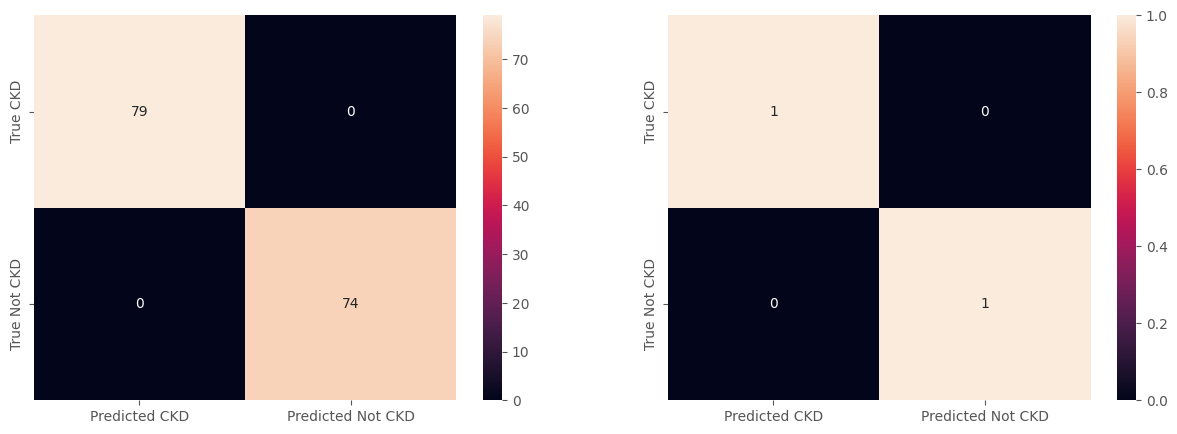

In [75]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest_training_set = clf.predict(X_train)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print ("Accuracy: %i %% \n"%acc_random_forest)

class_names = ['Chronic Kidney Disease', 'No Chronic Kidney Disease']

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred_random_forest_training_set)
np.set_printoptions(precision=2)

print ('Confusion Matrix in Numbers')
print (cnf_matrix)
print ('')

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

print ('Confusion Matrix in Percentage')
print (cnf_matrix_percent)
print ('')

true_class_names = ['True CKD', 'True Not CKD']
predicted_class_names = ['Predicted CKD', 'Predicted Not CKD']

df_cnf_matrix = pd.DataFrame(cnf_matrix,
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent,
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (15,5))

plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')

plt.subplot(122)
sns.heatmap(df_cnf_matrix_percent, annot=True)

In [76]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC',
              'Decision Tree', 'Random Forest', 'Naive Bayes'],

    'Score': [acc_log_reg, acc_svc, acc_linear_svc,
              acc_decision_tree, acc_random_forest, acc_gnb]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
1,Support Vector Machines,100.00
2,Linear SVC,100.00
3,Decision Tree,100.00
4,Random Forest,100.00
0,Logistic Regression,98.69
5,Naive Bayes,95.42
